In [ ]:
import pandas as pd 

df = pd.read_csv('./pass.csv')

df.head()

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

fig, ax = plt.subplots(1, 2, figsize = (10, 5))


ax[0].plot(df['x'])

ax[1].plot(np.log(df['x']))

#### 로그 변환 전(왼쪽)은 값이 시간이 지날수록 점점 증가하는 추세를 보임  

####  로그 변환 후(오른쪽)은 추세가 완만하게 나타나 데이터의 증가가 고르게 변환됨

In [ ]:
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
import warnings
warnings.filterwarnings('ignore')

# 로그 변환 
df['log_x'] = np.log(df['x'])

# 차분(데이터가 평균에 대한 변동이 고르게 나타나도록함)
df['log_x_diff'] = df['log_x'].diff().dropna()


df

In [ ]:


# 차분 데이터 시각화 
plt.figure(figsize=(10, 4))
plt.plot(df['log_x_diff'])
plt.title('Differenced series')
plt.legend()
plt.show()

### ACF, PACF 확인

In [ ]:
fig, axes = plt.subplots(1, 2, figsize=(12, 4))

# ACF, PACF plot
plot_acf(df['log_x_diff'].dropna(), lags=20, ax=axes[0])
axes[0].set_title('ACF Plot (MA order)')

plot_pacf(df['log_x_diff'].dropna(), lags=20, ax=axes[1])
axes[1].set_title('PACF Plot (AR order)')

plt.show()

# ACF는 2 시점에서 절단되는 ACF 그래프를 보이고 있으므로 MA(2) 모델을 사용

# PACF는 2 시점에서 절단되는 PACF 그래프를 보이고 있으므로 AR(2) 모델을 사용

In [ ]:
# SARIMA 모델

from statsmodels.tsa.statespace.sarimax import SARIMAX
from sklearn.metrics import mean_squared_error


# SARIMA(2, 1, 2)(1, 0, 1, 12) 모델 적합

model = SARIMAX(df['log_x_diff'], order=(1, 1, 1), seasonal_order=(1, 1, 1, 12)).fit()

pred = model.predict(1, len(df['log_x_diff']))

# 3. 모델 적합도 지표
print(f"AIC: {model.aic}")
print(f"BIC: {model.bic}")
print(f'MSE: {mean_squared_error(df["log_x_diff"][1:], pred[1:])}')


# 예측값 실제값 그래프 시각화

plt.figure(figsize=(10, 4))

# 예측값

plt.plot(pred, label='predict')

# 실제값

plt.plot(df['log_x_diff'], label='actual')

plt.title('SARIMA Actual vs Predicted')


plt.legend()    
plt.show()

Epoch [10/1000], Loss: 0.4106
Epoch [20/1000], Loss: 0.2000
Epoch [30/1000], Loss: 0.1161
Epoch [40/1000], Loss: 0.1186
Epoch [50/1000], Loss: 0.1070
Epoch [60/1000], Loss: 0.1038
Epoch [70/1000], Loss: 0.1000
Epoch [80/1000], Loss: 0.0966
Epoch [90/1000], Loss: 0.0937
Epoch [100/1000], Loss: 0.0908
Epoch [110/1000], Loss: 0.0879
Epoch [120/1000], Loss: 0.0853
Epoch [130/1000], Loss: 0.0828
Epoch [140/1000], Loss: 0.0805
Epoch [150/1000], Loss: 0.0784
Epoch [160/1000], Loss: 0.0765
Epoch [170/1000], Loss: 0.0747
Epoch [180/1000], Loss: 0.0731
Epoch [190/1000], Loss: 0.0715
Epoch [200/1000], Loss: 0.0700
Epoch [210/1000], Loss: 0.0685
Epoch [220/1000], Loss: 0.0671
Epoch [230/1000], Loss: 0.0656
Epoch [240/1000], Loss: 0.0641
Epoch [250/1000], Loss: 0.0627
Epoch [260/1000], Loss: 0.0612
Epoch [270/1000], Loss: 0.0598
Epoch [280/1000], Loss: 0.0585
Epoch [290/1000], Loss: 0.0573
Epoch [300/1000], Loss: 0.0561
Epoch [310/1000], Loss: 0.0551
Epoch [320/1000], Loss: 0.0542
Epoch [330/1000],

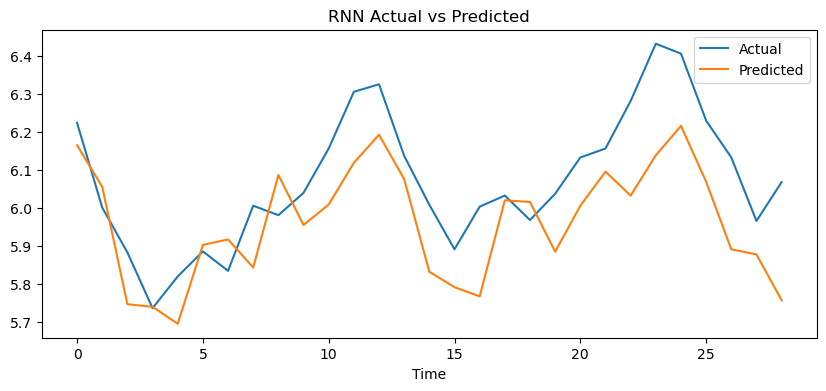

In [89]:
import torch
import torch.nn as nn
import torch.optim as optim
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# 데이터 로드 및 전처리
data = pd.read_csv('./pass.csv')
data['log_x'] = np.log(data['x'])  # 로그 변환
scaler = StandardScaler()
data['scaled_log_x'] = scaler.fit_transform(data[['log_x']])  # 표준화


# 시계열 특성 생성 (예: 3개 이전 시점으로 다음 값을 예측)
def sequences(data, seq_length):
    sequences = []
    targets = []
    for i in range(len(data) - seq_length):
        sequences.append(data[i:i + seq_length])
        targets.append(data[i + seq_length])
    return np.array(sequences), np.array(targets)

seq_length = 3

X, y = sequences(data['scaled_log_x'].values, seq_length)


# from torch.utils.data import DataLoader, TensorDataset

# X = X.reshape(X.shape[0], X.shape[1], 1)

# dataset = TensorDataset(torch.FloatTensor(X), torch.FloatTensor(y))

# dataloader = DataLoader(dataset, batch_size = 10, shuffle=False)


# 입력 데이터 차원 변환
X = X.reshape(X.shape[0], X.shape[1], 1)



# 데이터셋 분할
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)




# PyTorch 텐서로 변환
X_train = torch.FloatTensor(X_train)
y_train = torch.FloatTensor(y_train)
X_test = torch.FloatTensor(X_test)
y_test = torch.FloatTensor(y_test)

# 데이터 확인
(X_train.shape, y_train.shape), (X_test.shape, y_test.shape)

# from torch.utils.data import DataLoader, TensorDataset

# train_dataset = TensorDataset(X_train, y_train) 

# train_loader = DataLoader(train_dataset, batch_size=10, shuffle=False)


class SimpleRNN(nn.Module):
    def __init__(self, input_size, hidden_size, output_size):
        super(SimpleRNN, self).__init__()
        self.hidden_size = hidden_size
        self.rnn = nn.RNN(input_size, hidden_size, batch_first=True)
        self.fc = nn.Linear(hidden_size, output_size)
        
    def forward(self, x):
        # RNN의 은닉 상태 초기화
        h0 = torch.zeros(1, x.size(0), self.hidden_size).to(x.device)
        
        # RNN을 통과하면서 은닉 상태 계산
        out, _ = self.rnn(x, h0)
        
        # 마지막 시점의 출력값을 사용
        out = self.fc(out[:, -1])
        
        return out



# 모델 초기화
input_size = 1
hidden_size = 60
output_size = 1
model = SimpleRNN(input_size, hidden_size, output_size)

# 손실 함수와 최적화 함수 설정
criterion = nn.MSELoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)  


# 모델 학습
epochs = 1000
for epoch in range(epochs):
     
    optimizer.zero_grad()
    
    outputs = model(X_train)
    
    loss = criterion(outputs, y_train.unsqueeze(1))

    loss.backward()
    optimizer.step()
        
    if (epoch + 1) % 10 == 0:
        print(f'Epoch [{epoch+1}/{epochs}], Loss: {loss.item():.4f}')



# 모델 평가
model.eval()
with torch.no_grad():

    # 예측값 계산
    predictions = model(X_test) 


    # loss
    test_loss = criterion(predictions, y_test.unsqueeze(1))
    print(f'Test Loss (MSE): {test_loss.item():.4f}')



# 결과 역변환 및 시각화
predictions = scaler.inverse_transform(predictions.numpy().reshape(-1, 1))
y_test = scaler.inverse_transform(y_test.numpy().reshape(-1, 1))

plt.figure(figsize=(10, 4))
plt.plot(y_test, label='Actual')
plt.plot(predictions, label='Predicted')
plt.xlabel('Time')
plt.legend()
plt.title('RNN Actual vs Predicted')
plt.show()

## **LSTM**

In [96]:
import torch
import torch.nn as nn
import torch.optim as optim
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import numpy as np
import pandas as pd

# 데이터 로드 및 전처리
data = pd.read_csv('./pass.csv')
data['log_x'] = np.log(data['x'])  # 로그 변환
scaler = StandardScaler()
data['scaled_log_x'] = scaler.fit_transform(data[['log_x']])  # 표준화


# 시계열 특성 생성 (예: 3개 이전 시점으로 다음 값을 예측)
def sequences(data, seq_length, pred_length):
    sequences = []
    targets = []
    for i in range(len(data) - seq_length - pred_length + 1):
        sequences.append(data[i:i + seq_length])
        targets.append(data[i + seq_length : i + seq_length + pred_length])  # pred_length 만큼의 타겟을 포함하도록 수정
    return np.array(sequences), np.array(targets)


seq_length = 3
pred_length = 1

X, y = sequences(data['scaled_log_x'], seq_length, pred_length)

# 입력 데이터 차원 변환
X = X.reshape(X.shape[0], X.shape[1], 1)

# 데이터셋 분할
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)

# PyTorch 텐서로 변환
X_train = torch.FloatTensor(X_train)
y_train = torch.FloatTensor(y_train)
X_test = torch.FloatTensor(X_test)
y_test = torch.FloatTensor(y_test)


class _LSTM(nn.Module):
    def __init__(self, input_size, hidden_size, output_size):
        super().__init__()

        self.hidden_size = hidden_size
        
        self.lstm = nn.LSTM(input_size, hidden_size, batch_first=True)
        self.fc = nn.Linear(hidden_size, output_size)
        
    def forward(self, x):

        out, _ = self.lstm(x)
        # out = self.lstm(x)[0]
        
        # 마지막 시점의 출력값을 사용
        out = self.fc(out[:, -1])
        # out = self.fc(out)
        
        return out


# 모델 초기화
epochs = 1000
input_size = 1
hidden_size = 60
model = _LSTM(input_size, hidden_size, pred_length)


# 데이터 확인
print(X_train.shape, y_train.shape), (X_test.shape, y_test.shape)

# 손실 함수와 최적화 함수 설정
criterion = nn.MSELoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)


# 모델 학습
for epoch in range(epochs):
    optimizer.zero_grad()
    
    outputs = model(X_train)
    loss = criterion(outputs, y_train)
    
    loss.backward()
    optimizer.step()
    
    
    if (epoch + 1) % 100 == 0:
        print(f'LSTM Epoch [{epoch+1}/{epochs}], Loss: {loss.item():.4f}')


    outputs = model(X_train)
    loss = criterion(outputs, y_train)
    
    loss.backward()
    optimizer.step()
    
    
    if (epoch + 1) % 100 == 0:
        print(f'LSTM Epoch [{epoch+1}/{epochs}], Loss: {loss.item():.4f}')




# 모델 평가
model.eval()
with torch.no_grad():
    pred = model(X_test)
    test_loss = criterion(pred, y_test)
    print(f'LSTM Test Loss (MSE): {test_loss.item():.4f}')


# 결과 역변환 및 시각화
predictions = scaler.inverse_transform(predictions.numpy().reshape(-1, 1))
y_test = scaler.inverse_transform(y_test.numpy().reshape(-1, 1))

plt.figure(figsize=(10, 4))
plt.plot(y_test, label='Actual')
plt.plot(predictions, label='Predicted')
plt.xlabel('Time')
plt.legend()
plt.title('RNN Actual vs Predicted')
plt.show()

torch.Size([29, 1])

In [12]:
import torch
import torch.nn as nn
import torch.optim as optim
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import numpy as np
import pandas as pd

# 데이터 로드 및 전처리
data = pd.read_csv('./pass.csv')
data['log_x'] = np.log(data['x'])  # 로그 변환
scaler = StandardScaler()
data['scaled_log_x'] = scaler.fit_transform(data[['log_x']])  # 표준화

# 시계열 특성 생성 (예: 3개 이전 시점으로 다음 값을 예측)
def sequences(data, seq_length, pred_length):
    sequences = []
    targets = []
    for i in range(len(data) - seq_length - pred_length + 1):
        sequences.append(data[i:i + seq_length])
        targets.append(data[i + seq_length : i + seq_length + pred_length])  # pred_length 만큼의 타겟을 포함하도록 수정
    return np.array(sequences), np.array(targets)


seq_length = 3
pred_length = 1

X, y = sequences(data['scaled_log_x'], seq_length, pred_length)

# 입력 데이터 차원 변환
X = X.reshape(X.shape[0], X.shape[1], 1)

# 데이터셋 분할
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)

# PyTorch 텐서로 변환
X_train = torch.FloatTensor(X_train)
y_train = torch.FloatTensor(y_train)
X_test = torch.FloatTensor(X_test)
y_test = torch.FloatTensor(y_test)

class _LSTM(nn.Module):
    def __init__(self, input_size, hidden_size, output_size):
        super().__init__()

        self.hidden_size = hidden_size
        
        self.lstm = nn.LSTM(input_size, hidden_size, batch_first=True)
        self.fc = nn.Linear(hidden_size, output_size)
        
    def forward(self, x):

        # out, _ = self.lstm(x)
        
        # # 마지막 시점의 출력값을 사용
        # out = self.fc(out[:, -1])
        
        z = self.lstm(x)[0]
        out = self.fc(z[:, -1])
        
        return out


# 모델 초기화
epochs = 1000
input_size = 1
hidden_size = 60
output_size = 1
model = _LSTM(input_size, hidden_size, output_size)


# 데이터 확인
(X_train.shape, y_train.shape), (X_test.shape, y_test.shape)

# 손실 함수와 최적화 함수 설정
criterion = nn.MSELoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)


# 모델 학습
for epoch in range(epochs):
    model.train()
    optimizer.zero_grad()
    outputs = model(X_train)
    
    loss = criterion(outputs.squeeze(1), y_train)
    
    loss.backward()
    optimizer.step()
    
    
    if (epoch + 1) % 100 == 0:
        print(f'LSTM Epoch [{epoch+1}/{epochs}], Loss: {loss.item():.4f}')



# 모델 평가
model.eval()
with torch.no_grad():
    pred = model(X_test)
    test_loss = criterion(pred, y_test)
    print(f'LSTM Test Loss (MSE): {test_loss.item():.4f}')



IndexError: Dimension out of range (expected to be in range of [-2, 1], but got 2)

In [ ]:


# 결과 역변환 및 시각화
predictions_lstm = scaler.inverse_transform(pred.numpy().reshape(-1, 1))
y_test_lstm = scaler.inverse_transform(y_test.numpy().reshape(-1, 1))

plt.figure(figsize=(10, 4))
plt.plot(y_test_lstm, label='Actual')
plt.plot(predictions_lstm, label='Predicted')
plt.xlabel('Time')
plt.legend()
plt.title('LSTM Actual vs Predicted')
plt.show()

In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import numpy as np
import pandas as pd

# 데이터 로드 및 전처리
data = pd.read_csv('./pass.csv')
data['log_x'] = np.log(data['x'])  # 로그 변환
scaler = StandardScaler()
data['scaled_log_x'] = scaler.fit_transform(data[['log_x']])  # 표준화

# 시계열 특성 생성 (예: 3개 이전 시점으로 다음 값을 예측)
def sequences(data, seq_length):
    sequences = []
    targets = []
    for i in range(len(data) - seq_length):
        sequences.append(data[i:i + seq_length])
        targets.append(data[i + seq_length])
    return np.array(sequences), np.array(targets)

# 시계열 특성 생성 output_length 설정
def sequences_multi_output(data, seq_length, output_length):
    """
    입력: 데이터를 슬라이딩 윈도우 방식으로 분할하여 다단계 예측 데이터를 생성.
    Args:
        data (array): 원본 데이터 (1D numpy array)
        seq_length (int): 입력 시퀀스 길이
        output_length (int): 출력 시퀀스 길이
    Returns:
        sequences (array): 입력 시퀀스 배열 (samples, seq_length)
        targets (array): 출력 시퀀스 배열 (samples, output_length)
    """
    sequences = []
    targets = []
    for i in range(len(data) - seq_length - output_length + 1):
        sequences.append(data[i:i + seq_length])  # 입력 데이터
        targets.append(data[i + seq_length : i + seq_length + output_length])  # 다단계 출력 데이터
    return np.array(sequences), np.array(targets)

seq_length = 3
output_length = 1
X, y = sequences(data['scaled_log_x'].values, seq_length)
# X, y = sequences_multi_output(data['scaled_log_x'].values, seq_length, output_length=3)
X = X.reshape(X.shape[0], X.shape[1], 1)



# 데이터셋 분할
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)

# PyTorch 텐서로 변환
X_train = torch.FloatTensor(X_train)
y_train = torch.FloatTensor(y_train)
X_test = torch.FloatTensor(X_test)
y_test = torch.FloatTensor(y_test)

# 데이터 확인
(X_train.shape, y_train.shape), (X_test.shape, y_test.shape)


# 모델 초기화
epochs = 1000
input_size = 1
hidden_size = 60
output_size = 1

class GRU(nn.Module):
    def __init__(self, input_size, hidden_size, output_size):
        super(GRU, self).__init__()
        self.hidden_size = hidden_size
        self.gru = nn.GRU(input_size, hidden_size, batch_first=True)
        self.fc = nn.Linear(hidden_size, output_size)
        
    def forward(self, x):
        # GRU의 은닉 상태 초기화
        h0 = torch.zeros(1, x.size(0), self.hidden_size).to(x.device)
        
        # GRU를 통과하면서 은닉 상태 계산
        out, _ = self.gru(x, h0)
        
        # 마지막 시점의 출력값을 사용
        out = self.fc(out[:, -1])
        
        return out

# 모델 초기화
model = GRU(input_size, hidden_size, output_size)

# 손실 함수와 최적화 함수 설정
criterion = nn.MSELoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

# 모델 학습
for epoch in range(epochs):
    model.train()
    optimizer.zero_grad()
    outputs = model(X_train)

    loss = criterion(outputs.squeeze(), y_train)
    loss.backward()
    optimizer.step()
    
    if (epoch + 1) % 10 == 0:
        print(f'GRU Epoch [{epoch+1}/{epochs}], Loss: {loss.item():.4f}')



GRU Epoch [10/1000], Loss: 0.6220
GRU Epoch [20/1000], Loss: 0.4742
GRU Epoch [30/1000], Loss: 0.3378
GRU Epoch [40/1000], Loss: 0.2108
GRU Epoch [50/1000], Loss: 0.1224
GRU Epoch [60/1000], Loss: 0.1051
GRU Epoch [70/1000], Loss: 0.1071
GRU Epoch [80/1000], Loss: 0.1016
GRU Epoch [90/1000], Loss: 0.1008
GRU Epoch [100/1000], Loss: 0.0994
GRU Epoch [110/1000], Loss: 0.0981
GRU Epoch [120/1000], Loss: 0.0969
GRU Epoch [130/1000], Loss: 0.0955
GRU Epoch [140/1000], Loss: 0.0942
GRU Epoch [150/1000], Loss: 0.0927
GRU Epoch [160/1000], Loss: 0.0911
GRU Epoch [170/1000], Loss: 0.0895
GRU Epoch [180/1000], Loss: 0.0877
GRU Epoch [190/1000], Loss: 0.0858
GRU Epoch [200/1000], Loss: 0.0838
GRU Epoch [210/1000], Loss: 0.0818
GRU Epoch [220/1000], Loss: 0.0796
GRU Epoch [230/1000], Loss: 0.0774
GRU Epoch [240/1000], Loss: 0.0753
GRU Epoch [250/1000], Loss: 0.0731
GRU Epoch [260/1000], Loss: 0.0711
GRU Epoch [270/1000], Loss: 0.0692
GRU Epoch [280/1000], Loss: 0.0675
GRU Epoch [290/1000], Loss: 0

In [ ]:

# 모델 평가
model.eval()
with torch.no_grad():
    predictions_gru = model(X_test)
    test_loss = criterion(predictions_gru.squeeze(), y_test)
    print(f'GRU Test Loss (MSE): {test_loss.item():.4f}')

# 결과 역변환 및 시각화
predictions_gru = scaler.inverse_transform(predictions_gru.numpy().reshape(-1, 1))
y_test_gru = scaler.inverse_transform(y_test.numpy().reshape(-1, 1))

plt.figure(figsize=(10, 4))
plt.plot(y_test_gru, label='Actual')
plt.plot(predictions_gru, label='Predicted')
plt.xlabel('Time')
plt.legend()
plt.title('GRU Actual vs Predicted')
plt.show()